In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
from fastai import *
from fastai.vision import *
import torch
from pathlib import *

In [3]:
path=Path("../input")
path.ls()

[PosixPath('../input/train'),
 PosixPath('../input/test'),
 PosixPath('../input/train.csv'),
 PosixPath('../input/sample_submission.csv')]

In [4]:
train=pd.read_csv('../input/train.csv')
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


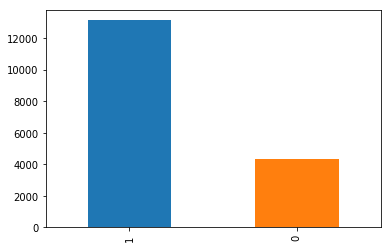

In [5]:
train.has_cactus.value_counts().plot(kind='bar')

In [6]:
test=pd.read_csv('../input/sample_submission.csv')

In [7]:
test.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [8]:
test_img=ImageList.from_df(test, path=path/"test", folder="test")
tfms=get_transforms(flip_vert=True)

In [11]:
train_img= (ImageList.from_df(train, path=path/'train', folder="train")
            .split_by_rand_pct(0.01)
            .label_from_df()
            .add_test(test_img)
            .transform(tfms, size=256)
            .databunch(path='../input', bs=64)
            .normalize(imagenet_stats)
           )

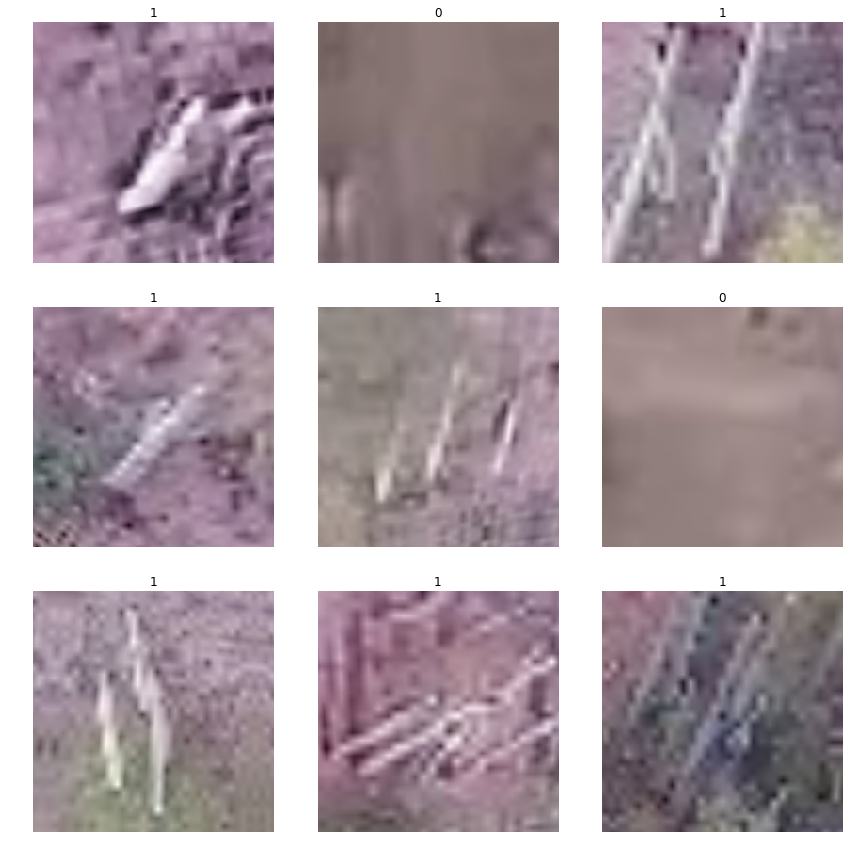

In [12]:
train_img.show_batch(rows=3)

In [13]:
learn=cnn_learner(train_img, models.resnet50, metrics=[error_rate, accuracy], path=".")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 59618573.45it/s]


In [15]:
lr = 3e-3
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.043243,0.000957,0.000000,1.000000,02:20
1,0.020225,0.000719,0.000000,1.000000,02:19
2,0.012714,0.000779,0.000000,1.000000,02:22


In [16]:
probability, classification = learn.get_preds(ds_type=DatasetType.Test)
test.has_cactus = probability.numpy()[:, 0]
test.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.000126
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.000040
2,001ee6d8564003107853118ab87df407.jpg,0.999999
3,002e175c3c1e060769475f52182583d0.jpg,1.000000
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.000186


In [17]:
test.to_csv("submission_2.csv", index=False)